In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('housing 5.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


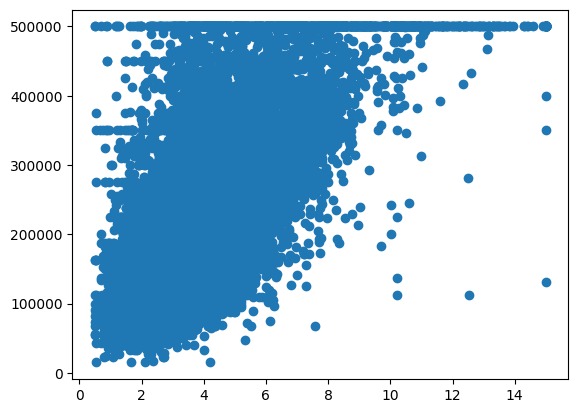

In [5]:
plt.scatter(df.median_income,df.median_house_value)

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
train_cat = df[["ocean_proximity"]] #select the categorical attribute


In [9]:
train_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [8]:
# train_cat contains the categorical attribute ocean_proximity
train_cat.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [12]:
#convert the categorical attribute to numerical attribute
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_cat_OrdEncoded = ordinal_encoder.fit_transform(train_cat) #fit and transform the categorical attribute
#check the categories
ordinal_encoder.categories

'auto'

In [13]:
train_cat_OrdEncoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [14]:
train_cat_OrdEncoded.shape

(20640, 1)

In [14]:
train_cat_OrdEncoded[:10] #is a numpy array

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [15]:
train_cat_OrdEncoded[:2]

array([[3.],
       [3.]])

In [15]:
#check value counts of the encoded categorical attribute
pd.DataFrame(train_cat_OrdEncoded).value_counts()


0.0    9136
1.0    6551
4.0    2658
3.0    2290
2.0       5
dtype: int64

In [16]:
train_num = df.drop("ocean_proximity", axis=1)

In [17]:
#check for missing values
train_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(train_num) #fit the imputer to the numerical attributes

SimpleImputer(strategy='median')

In [19]:
SimpleImputer(strategy='median')

SimpleImputer(strategy='median')

In [20]:
X = imputer.transform(train_num) #transform the train set
train_tr = pd.DataFrame(X, columns=train_num.columns, index=train_num.index) #convert the numpy array to pandas dataframe

In [21]:
#check for missing values
train_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [22]:
y_predicted = km.fit_predict(train_tr)

In [23]:
y_predicted

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [24]:
df['cluster']= y_predicted
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [25]:
df[['cluster']].value_counts

<bound method DataFrame.value_counts of        cluster
0            1
1            1
2            1
3            1
4            1
...        ...
20635        2
20636        2
20637        2
20638        2
20639        2

[20640 rows x 1 columns]>

In [ ]:
#adult income dataset

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_openml
import random
from scipy.spatial.distance import euclidean, pdist
from itertools import combinations

# Load the "adult income" dataset from the public domain
data = fetch_openml(name='adult', version=1)
X = pd.DataFrame(data.data, columns=data.feature_names)

# Select a subset of features for clustering (you can modify this)
selected_features = ['age', 'education-num', 'hours-per-week']
X_subset = X[selected_features]

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Step 1: Identify the number of clusters randomly
n_clusters = random.randint(2, 10)

# Step 2: Initialize K-means with random centroids
kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=0)
kmeans.fit(X_scaled)

# Initialize variables for Dunn's Index calculation
min_intercluster_distances = np.inf
max_intracluster_distances = -np.inf

# Step 3 and 4: Perform K-means clustering and update centroids until convergence
while True:
    # Assign data points to clusters
    cluster_labels = kmeans.predict(X_scaled)

    # Calculate new centroids
    new_centroids = np.array([X_scaled[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])

    # Check for convergence by comparing old and new centroids
    if np.allclose(kmeans.cluster_centers_, new_centroids):
        break

    # Update centroids
    kmeans.cluster_centers_ = new_centroids

    # Step 7: Calculate metrics (Inertia and Dunn's Index)
    # Inertia is readily available from the KMeans class
    inertia = kmeans.inertia_

    # Calculate Dunn's Index
    intercluster_distances = pairwise_distances(kmeans.cluster_centers_)
    intracluster_distances = np.array([np.max(pdist(X_scaled[cluster_labels == i])) for i in range(n_clusters)])

    min_intercluster_distances = min(np.min(intercluster_distances[~np.eye(n_clusters, dtype=bool)]), min_intercluster_distances)
    max_intracluster_distances = max(np.max(intracluster_distances), max_intracluster_distances)

dunn_index = min_intercluster_distances / max_intracluster_distances

# Print the results
print(f"Number of clusters: {n_clusters}")
print(f"Inertia: {inertia}")
print(f"Dunn's Index: {dunn_index}")


KeyError: "['hours-per-week'] not in index"

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_openml
import random
from scipy.spatial.distance import euclidean, pdist
from itertools import combinations

# Load the "adult income" dataset from the public domain
data = fetch_openml(name='adult', version=1)
X = pd.DataFrame(data.data, columns=data.feature_names)

# Select features for clustering
selected_features = ['age', 'education-num']
X_selected = X[selected_features]

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 1: Identify the number of clusters randomly
n_clusters = random.randint(2, 10)

# Step 2: Initialize K-means with random centroids
kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=0)
kmeans.fit(X_scaled)

# Initialize variables for Dunn's Index calculation
min_intercluster_distances = np.inf
max_intracluster_distances = -np.inf

# Step 3 and 4: Perform K-means clustering and update centroids until convergence
while True:
    # Assign data points to clusters
    cluster_labels = kmeans.predict(X_scaled)

    # Calculate new centroids
    new_centroids = np.array([X_scaled[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])

    # Check for convergence by comparing old and new centroids
    if np.allclose(kmeans.cluster_centers_, new_centroids):
        break

    # Update centroids
    kmeans.cluster_centers_ = new_centroids

    # Step 7: Calculate metrics (Inertia and Dunn's Index)
    # Inertia is readily available from the KMeans class
    inertia = kmeans.inertia_

    # Calculate Dunn's Index
    intercluster_distances = pairwise_distances(kmeans.cluster_centers_)
    intracluster_distances = np.array([np.max(pdist(X_scaled[cluster_labels == i])) for i in range(n_clusters)])

    min_intercluster_distances = min(np.min(intercluster_distances[~np.eye(n_clusters, dtype=bool)]), min_intercluster_distances)
    max_intracluster_distances = max(np.max(intracluster_distances), max_intracluster_distances)

dunn_index = min_intercluster_distances / max_intracluster_distances

# Print the results
print(f"Number of clusters: {n_clusters}")
print(f"Inertia: {inertia}")
print(f"Dunn's Index: {dunn_index}")


Number of clusters: 3


NameError: name 'inertia' is not defined

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_openml
import random
from scipy.spatial.distance import euclidean, pdist
from itertools import combinations

# Load the "adult income" dataset from the public domain
data = fetch_openml(name='adult', version=1)
X = pd.DataFrame(data.data, columns=data.feature_names)

# Select features for clustering
selected_features = ['age', 'education-num']
X_selected = X[selected_features]

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 1: Identify the number of clusters randomly
n_clusters = random.randint(2, 10)

# Step 2: Initialize K-means with random centroids
kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=0)
kmeans.fit(X_scaled)

# Initialize variables for Dunn's Index calculation
min_intercluster_distances = np.inf
max_intracluster_distances = -np.inf

# Initialize inertia
inertia = kmeans.inertia_

# Step 3 and 4: Perform K-means clustering and update centroids until convergence
while True:
    # Assign data points to clusters
    cluster_labels = kmeans.predict(X_scaled)

    # Calculate new centroids
    new_centroids = np.array([X_scaled[cluster_labels == i].mean(axis=0) for i in range(n_clusters)])

    # Check for convergence by comparing old and new centroids
    if np.allclose(kmeans.cluster_centers_, new_centroids):
        break

    # Update centroids
    kmeans.cluster_centers_ = new_centroids

    # Update inertia
    inertia = kmeans.inertia_

    # Step 7: Calculate metrics (Dunn's Index)
    # Calculate Dunn's Index
    intercluster_distances = pairwise_distances(kmeans.cluster_centers_)
    intracluster_distances = np.array([np.max(pdist(X_scaled[cluster_labels == i])) for i in range(n_clusters)])

    min_intercluster_distances = min(np.min(intercluster_distances[~np.eye(n_clusters, dtype=bool)]), min_intercluster_distances)
    max_intracluster_distances = max(np.max(intracluster_distances), max_intracluster_distances)

dunn_index = min_intercluster_distances / max_intracluster_distances

# Print the results
print(f"Number of clusters: {n_clusters}")
print(f"Inertia: {inertia}")
print(f"Dunn's Index: {dunn_index}")


Number of clusters: 3
Inertia: 38260.389145103894
Dunn's Index: nan


In [19]:
cluster_labels 

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import random

# Load the "adult income" dataset from the public domain
data = fetch_openml(name='adult', version=1)
X = pd.DataFrame(data.data, columns=data.feature_names)

# Select features for clustering
selected_features = ['age', 'education-num']
X_selected = X[selected_features]

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 1: Identify the number of clusters randomly
n_clusters = random.randint(2, 10)

# Step 2: Initialize K-means with random centroids
kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=0)
kmeans.fit(X_scaled)

# Add the cluster labels as a new column to the original dataset
X['cluster_label'] = kmeans.labels_

# Print the dataset with cluster labels
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,cluster_label
0,2,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,6
1,3,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,9
2,2,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,7
3,3,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,0
4,1,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,6
